<a href="https://colab.research.google.com/github/Samanvitha-Sateesha/Image_Classifiation/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Initial setup and Data Exploration**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train[:5]
y_train = y_train.reshape(-1,)   #To change the shape from 2D array to 1D array, we use reshape function
#Since, we don't want to change first dimension it's -1 and we will leave it blank after comma since we want it to be flattened by 1 dim 
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [5]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [6]:
def plot_sample(X, y, index):     #A function to plot images
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

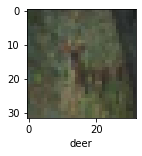

In [7]:
plot_sample(X_train, y_train, 10)

**Normalising the Data**

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

**Building a Convolution Neural Network**

In [14]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), padding = "same", activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding = "same", activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), padding = "same", activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.2741 - accuracy: 0.9047
Epoch 2/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.2381 - accuracy: 0.9162
Epoch 3/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.2111 - accuracy: 0.9256
Epoch 4/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1915 - accuracy: 0.9320
Epoch 5/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1758 - accuracy: 0.9383
Epoch 6/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1572 - accuracy: 0.9450
Epoch 7/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1485 - accuracy: 0.9477
Epoch 8/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1435 - accuracy: 0.9494
Epoch 9/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1300 - accuracy: 0.9559
Epoch 10/20
1563/1563 [==============================] - 14s 9ms/step - l

In [19]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.8804 - accuracy: 0.7289


[1.880430817604065, 0.7289000153541565]